# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 98s 1us/step


In [5]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))
print('x_img_train.shape:  ', x_img_train.shape)
print('y_label_train.shape:', y_label_train.shape) 
print('x_img_test.shape:   ', x_img_test.shape)
print('y_label_test.shape: ', y_label_test.shape)

train: 50000
test : 10000
x_img_train.shape:   (50000, 32, 32, 3)
y_label_train.shape: (50000, 1)
x_img_test.shape:    (10000, 32, 32, 3)
y_label_test.shape:  (10000, 1)


In [7]:
cifar100.print_function

_Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 65536)

### print label names

In [81]:
cifar100.load_batch
import pickle
with open('C:\\Users\\Kevin\\.keras\\datasets\\cifar-100-python\\meta', 'rb') as fo:
    label_names = pickle.load(fo, encoding='bytes')

#print('label_names:', label_names.items())

In [88]:
for index, content in enumerate(label_names.items()):
    print('item {0}: {1}'.format(index, content))

item 0: (b'fine_label_names', [b'apple', b'aquarium_fish', b'baby', b'bear', b'beaver', b'bed', b'bee', b'beetle', b'bicycle', b'bottle', b'bowl', b'boy', b'bridge', b'bus', b'butterfly', b'camel', b'can', b'castle', b'caterpillar', b'cattle', b'chair', b'chimpanzee', b'clock', b'cloud', b'cockroach', b'couch', b'crab', b'crocodile', b'cup', b'dinosaur', b'dolphin', b'elephant', b'flatfish', b'forest', b'fox', b'girl', b'hamster', b'house', b'kangaroo', b'keyboard', b'lamp', b'lawn_mower', b'leopard', b'lion', b'lizard', b'lobster', b'man', b'maple_tree', b'motorcycle', b'mountain', b'mouse', b'mushroom', b'oak_tree', b'orange', b'orchid', b'otter', b'palm_tree', b'pear', b'pickup_truck', b'pine_tree', b'plain', b'plate', b'poppy', b'porcupine', b'possum', b'rabbit', b'raccoon', b'ray', b'road', b'rocket', b'rose', b'sea', b'seal', b'shark', b'shrew', b'skunk', b'skyscraper', b'snail', b'snake', b'spider', b'squirrel', b'streetcar', b'sunflower', b'sweet_pepper', b'table', b'tank', b't

In [83]:
label_dict={
0:"apple", 1:"aquarium_fish", 2:"baby", 3:"bear", 4:"beaver", 5:"bed", 6:"bee", 7:"beetle", 8:"bicycle", 9:"bottle",
10:"bowl",11:"boy",12:"bridge",13:"bus",14:"butterfly",15:"camel",16:"can",17:"castle",18:"caterpillar",19:"cattle",
20:"chair",21:"chimpanzee",22:"clock",23:"cloud",24:"cockroach",25:"couch",26:"crab",27:"crocodile",28:"cup",29:"dinosaur",
30:"dolphin",31:"elephant",32:"flatfish",33:"forest",34:"fox",35:"girl",36:"hamster",37:"house",38:"kangaroo",39:"keyboard",
40:"lamp",41:"lawn_mower",42:"leopard",43:"lion",44:"lizard",45:"lobster",46:"man",47:"maple_tree",48:"motorcycle",49:"mountain",
50:"mouse",51:"mushroom",52:"oak_tree",53:"orange",54:"orchid",55:"otter",56:"palm_tree",57:"pear",58:"pickup_truck",59:"pine_tree",
60:"plain",61:"plate",62:"poppy",63:"porcupine",64:"possum",65:"rabbit",66:"raccoon",67:"ray",68:"road",69:"rocket",
70:"rose",71:"sea",72:"seal",73:"shark",74:"shrew",75:"skunk",76:"skyscraper",77:"snail",78:"snake",79:"spider",
80:"squirrel",81:"streetcar",82:"sunflower",83:"sweet_pepper",84:"table",85:"tank",86:"telephone",87:"television",88:"tiger",89:"tractor",
90:"train",91:"trout",92:"tulip",93:"turtle",94:"wardrobe",95:"whale",96:"willow_tree",97:"wolf",98:"woman",99:"worm"}

In [86]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    #if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(10, 10, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

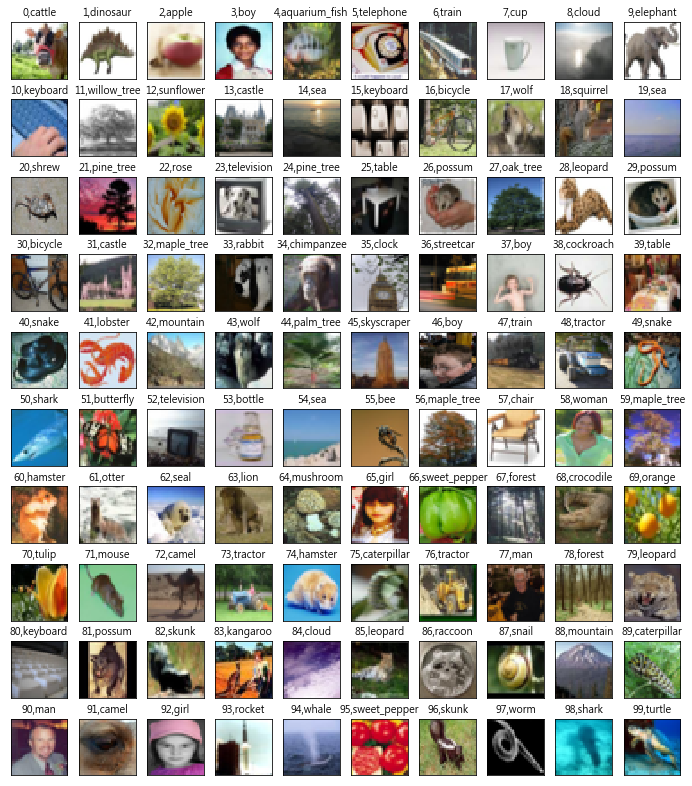

In [87]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [19]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [20]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [21]:
y_label_train_OneHot.shape

(50000, 100)

In [22]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.